**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

**Read in Raw Data**

In [2]:
filepath_train_data="./datasets/train.csv"
filepath_test_data="./datasets/test.csv"

df_train = pd.read_csv(filepath_train_data)
df_test = pd.read_csv(filepath_test_data) # We won't touch this until after we've created model

In [3]:
# check the shape of df_train
df_train.shape

(2051, 81)

In [4]:
# check the shape of df_test
df_test.shape

(878, 80)

In [5]:
# Quick check to see which column is in train.csv but not test.csv


In [6]:
pd.set_option('display.max_columns', 100)

In [7]:
df_train.head(30)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,

# Data Cleaning

In [8]:
# Setting the index for our data frame according to one of the columns (Id)
df_train.set_index("Id",inplace=True)

In [9]:
df_train.shape

(2051, 80)

In [10]:
{final: df_train[final].isnull().sum() for final in df_train.columns if df_train[final].isnull().sum() > 0}

{'Lot Frontage': 330,
 'Alley': 1911,
 'Mas Vnr Type': 22,
 'Mas Vnr Area': 22,
 'Bsmt Qual': 55,
 'Bsmt Cond': 55,
 'Bsmt Exposure': 58,
 'BsmtFin Type 1': 55,
 'BsmtFin SF 1': 1,
 'BsmtFin Type 2': 56,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Fireplace Qu': 1000,
 'Garage Type': 113,
 'Garage Yr Blt': 114,
 'Garage Finish': 114,
 'Garage Cars': 1,
 'Garage Area': 1,
 'Garage Qual': 114,
 'Garage Cond': 114,
 'Pool QC': 2042,
 'Fence': 1651,
 'Misc Feature': 1986}

In [11]:
# What percent of each column are missing?
df_train.isnull().mean()

PID             0.000000
MS SubClass     0.000000
MS Zoning       0.000000
Lot Frontage    0.160897
Lot Area        0.000000
                  ...   
Misc Val        0.000000
Mo Sold         0.000000
Yr Sold         0.000000
Sale Type       0.000000
SalePrice       0.000000
Length: 80, dtype: float64

In [12]:
{final: df_train[final].isnull().mean()*100 for final in df_train.columns if df_train[final].isnull().mean() > 0}
# ignore all of these features except for 'Total Bsmt SF', Garage Yr Blt',Garage Cars',Garage Area

{'Lot Frontage': 16.089712335446123,
 'Alley': 93.1740614334471,
 'Mas Vnr Type': 1.0726474890297415,
 'Mas Vnr Area': 1.0726474890297415,
 'Bsmt Qual': 2.681618722574354,
 'Bsmt Cond': 2.681618722574354,
 'Bsmt Exposure': 2.8278888347147735,
 'BsmtFin Type 1': 2.681618722574354,
 'BsmtFin SF 1': 0.04875670404680643,
 'BsmtFin Type 2': 2.7303754266211606,
 'BsmtFin SF 2': 0.04875670404680643,
 'Bsmt Unf SF': 0.04875670404680643,
 'Total Bsmt SF': 0.04875670404680643,
 'Bsmt Full Bath': 0.09751340809361286,
 'Bsmt Half Bath': 0.09751340809361286,
 'Fireplace Qu': 48.75670404680644,
 'Garage Type': 5.509507557289127,
 'Garage Yr Blt': 5.558264261335934,
 'Garage Finish': 5.558264261335934,
 'Garage Cars': 0.04875670404680643,
 'Garage Area': 0.04875670404680643,
 'Garage Qual': 5.558264261335934,
 'Garage Cond': 5.558264261335934,
 'Pool QC': 99.56118966357874,
 'Fence': 80.49731838127742,
 'Misc Feature': 96.83081423695758}

In [13]:
df_train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [15]:
df_train.SalePrice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [16]:
#clean up column names 
#we want all lower case
#we want _ instead of spaces 
#we want _ instead of / 

def clean(df):
    df.columns=df.columns.str.lower().str.replace("/ ","_").str.replace(" ","_")
    return df 

In [17]:
df_train=clean(df_train)

In [18]:
df_test=clean(df_test)

In [19]:
df_train.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [20]:
df_test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [21]:
columns_to_drop= [final for final in df_train.columns if (df_train[final].isnull().mean() > 0) & (final !='total_bsmt_sf') & (final!='garage_yr_blt') & (final!='garage_cars') & (final!="garage_area")] 

# Total Bsmt SF', Garage Yr Blt',Garage Cars',Garage Area

In [22]:
columns_to_drop

['lot_frontage',
 'alley',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [23]:
#After looking at correlations, going to ignore: 

df_train.drop(columns=columns_to_drop,inplace=True)

In [24]:
df_train["garage_yr_blt"].dropna(inplace=True)

In [25]:
df_train["garage_cars"].dropna(inplace=True)

In [29]:
df_train["garage_area"].dropna(inplace=True,axis=0) 

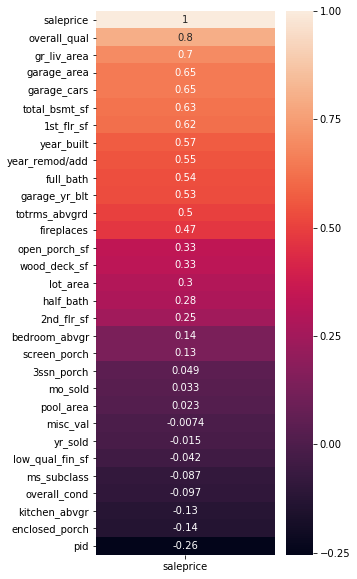

In [30]:
plt.figure(figsize=(4,10))
sns.heatmap(df_train.corr()[["saleprice"]].sort_values(by="saleprice",ascending=False), annot=True)

In [ ]:
df_train.isnull().sum()

In [28]:
df_train.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [32]:
df_train.dropna(inplace=True)

In [145]:
df_train.head(50)

,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,exter_qual,exter_cond,foundation,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,Gd,TA,CBlock,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,2,1,3,1,Gd,6,Typ,0,1976.0,2.0,475.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500
544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,2,1,4,1,Gd,8,Typ,1,1997.0,2.0,559.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000
153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,TA,Gd,CBlock,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,3,1,Gd,5,Typ,0,1953.0,1.0,246.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000
318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,2,1,3,1,TA,7,Typ,0,2007.0,2.0,400.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000
255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,TA,TA,PConc,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,2,0,3,1,TA,6,Typ,0,1957.0,2.0,484.0,N,0,59,0,0,0,0,0,3,2010,WD,138500
138,535126040,20,RL,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,Gd,TA,CBlock,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,2,1,2,1,Gd,6,Mod,1,1966.0,2.0,578.0,Y,0,0,0,0,0,0,0,6,2010,WD,190000
2827,908186070,180,RM,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,2,0,2,1,TA,5,Typ,0,2005.0,2.0,525.0,Y,0,44,0,0,0,0,0,6,2006,New,140000
145,535154050,20,RL,12160,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,TA,TA,CBlock,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1,0,3,1,TA,6,Typ,0,1959.0,2.0,531.0,Y,0,0,0,0,0,0,0,5,2010,COD,142000
1942,535353130,20,RL,15783,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,924.0,GasA,TA,Y,SBrkr,924,0,0,924,1,0,2,1,TA,6,Typ,0,1952.0,1.0,420.0,Y,0,324,0,0,0,0,400,6,2007,WD,112500


# EDA

Done!

## Preprocessing and Modeling

In [132]:
# Use "Overall Qual", "Lot Area", "Street" as features
#by looking at the correlations, potential factors: 
# YEAR BUILT-.57
# MAS VNR AREA - .51
# total bsmnt sf- .63 
# 1st floor SF- .62 
# gr liv area- .7
# full bath- .5  
# TotRms AbvGrd-.50 
# Garage Yr Blt .53 
# garage cars .65
# garage area- .65
# OVERALL QUAL-.8
# YEAR REMOD/ADD - .55 

#First, I'd like to create a simple model with two features with the highest correlations: overall qual and gr liv area
features = ["overall_qual","gr_liv_area","garage_area","garage_cars","total_bsmt_sf","year_built","year_remod/add","1st_flr_sf"]
X = df_train[features]
y = df_train["saleprice"]

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=9)

In [134]:
# Convert the street categories into processable numbers (i.e. turn categories into dummy variables)
lr=LinearRegression()

In [135]:
# Train-Test Split
cross_val_score(lr,X_train,y_train,cv=5).mean()

0.7595416456799711

In [136]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
predictions=lr.predict(X_test)

In [138]:
lr.score(X_train,y_train)

0.7750632688887296

In [139]:
lr.score(X_test,y_test)

0.8038474736700958

In [141]:
### Establish a Baseline Model that predicts y_train_mean for EVERYTHING

# Import Package
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
# Instantiate: creates a skeleton of a model that will always predict the mean of the target
base_mean = DummyRegressor(strategy='mean')

# Fit the (terrible) model
base_mean = base_mean.fit(X_train, y_train)

# Get predictions!
y_hat_base_train = base_mean.predict(X_train)
y_hat_base_test = base_mean.predict(X_test)

# Evaluate: let's use RMSE
print(f'Our train RMSE scorefor our Baseline Model is: {np.sqrt(mean_squared_error(y_train, y_hat_base_train))}')
print(f'Our test RMSE score for our Baseline Model is: {np.sqrt(mean_squared_error(y_test, y_hat_base_test))}')

Our train RMSE scorefor our Baseline Model is: 77686.30716935407
Our test RMSE score for our Baseline Model is: 82435.13798738336


**My Actual Model: Linear Regression**

In [ ]:
#Add features 

In [ ]:
# Instantiate our linear regression object: 


# Fit our model:


In [ ]:
# What are columns that are fed as input?


In [ ]:
# What is beta_0?


In [ ]:
# What are the rest of our betas?


In [ ]:
# Make Predictions
y_hat_lr_train =   # familiar data
y_hat_lr_test =  # unseen/unfamiliar data

# Get RMSE


# Preparing .csv to submit to Kaggle

In [ ]:
features

In [ ]:
# Create a dataframe of our features from our testing data
X_kaggle = df_test[features]

### WARNING ###
# NEED to apply the feature engineering methods you did above to this X_kaggle dataset too!
# Otherwise, your model won't have the inputs it expects!
X_kaggle = pd.get_dummies(X_kaggle, columns = ["Street"])

In [ ]:
# Make predictions and save those predictions to a new column
X_kaggle['SalePrice'] = lr.predict(X_kaggle)
X_kaggle.head()

In [ ]:
# Create a new dataframe of JUST our predictions
output = X_kaggle[['SalePrice']]
output.head()

In [ ]:
# Saving our predictions to our datasets folder
output.to_csv("./datasets/my_first_submission.csv")